# Уравнение Буссинеска



### $$ u_{tt}-u_{xx}-3(u^2)_{xx}-u_{xxxx}=0\qquad(1) $$

### Уравнение Буссинеска представляет собой уравнение нелинейной струны и имеет различные физические положения. В частности, оно описывает распространение длинных волн на поверхности воды. 

### Подстановкой

###  $$u=2(\ln f)_{xx}\qquad\qquad\qquad\qquad\quad(2)$$

### уравнение (1) сведётся к билинейному дифференциальному уравнению

###  $$(D_t^2-D_x^2-D_x^4)f\bullet f=0.\qquad\qquad(3)$$

### Пользуясь техникой Хироты, найти одно- и двухсолитонное решения уравнения Буссинеска.

### ==============================================================
# Решение

### Приведем уравнение (3) в привычное обозначение. Для этого избавимся от операторов Хироты. 

###  Сначала упростим уравнение (4), после чего заменим $g = g(\xi,\tau)$ на $f = f(x,t)$

### $$(D_t^2-D_x^2-D_x^4)f\bullet g=0.\qquad\qquad(4)$$


In [1]:
from sympy import *
init_printing(use_unicode=True)

x, xi, tau, t = symbols('x xi tau t')
d_t = Symbol('\partial_t')
d_x = Symbol('\partial_x')
d_tau = Symbol(r'\partial_\tau')
d_xi = Symbol(r'\partial_\xi')
f, g = symbols('f g', cls = Function)
D_t, D_x = symbols('D_t D_x', cls = Function)

# Операторы Хироты
D_t = d_t - d_tau
D_x = d_x - d_xi

Eq(Symbol('D_t^{2}fg'), expand(D_t*D_t)*f(x, t)*g(xi, tau))

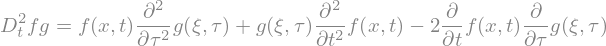

In [2]:
fg = f(x, t)*g(xi, tau)
s1 = fg.diff(t, t) - 2*fg.diff(t, tau) + fg.diff(tau, tau)
Eq(Symbol('D_t^{2}fg'), s1)

In [3]:
Eq(Symbol('D_x^{2}fg'), expand(D_x*D_x)*f(x, t)*g(xi, tau))

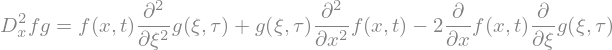

In [4]:
s2 = fg.diff(x, x) - 2*fg.diff(x, xi) + fg.diff(xi, xi)
Eq(Symbol('D_x^{2}fg'), s2)

In [5]:
Eq(Symbol('D_x^{4}fg'), expand((D_x**4))*f(x, t)*g(xi, tau))

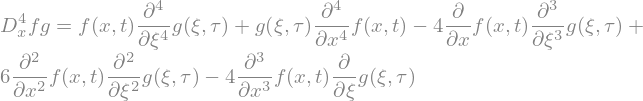

In [6]:
s3 = fg.diff(xi,xi,xi,xi)-4*fg.diff(xi,xi,xi,x)+6*fg.diff(xi,xi,x,x)-4*fg.diff(xi,x,x,x)+fg.diff(x,x,x,x)
Eq(Symbol('D_x^{4}fg'), s3)

### В полном виде, произведя замены $\xi$, $\tau$ и $g(\xi, \tau)$, ДУ (4) имеет вид

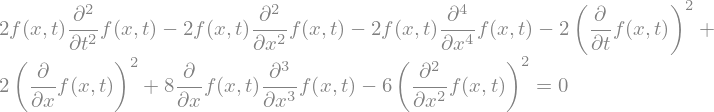

In [8]:
D = s1 - s2 - s3
D_ = D.subs([(xi, x), (tau, t), (g, f)])
Eq(D_,0)

Замечание: операторы дифференцирования действуют только на стоящуюю перед ними функцию.

### Перепишем на более понятном языке.

### $$ff_{tt}-f_{xx}-ff_{xxxx}-f_t^2+f_x^2+4f_xf_{xxx}-3f_{xx}^2=0$$

### Разложим $f$ в ряд по малому параметру $\varepsilon$:
### $$f = 1 + \varepsilon f^{(1)} + \varepsilon^2f^{(2)} + \varepsilon^3f^{(3)} + \dots$$

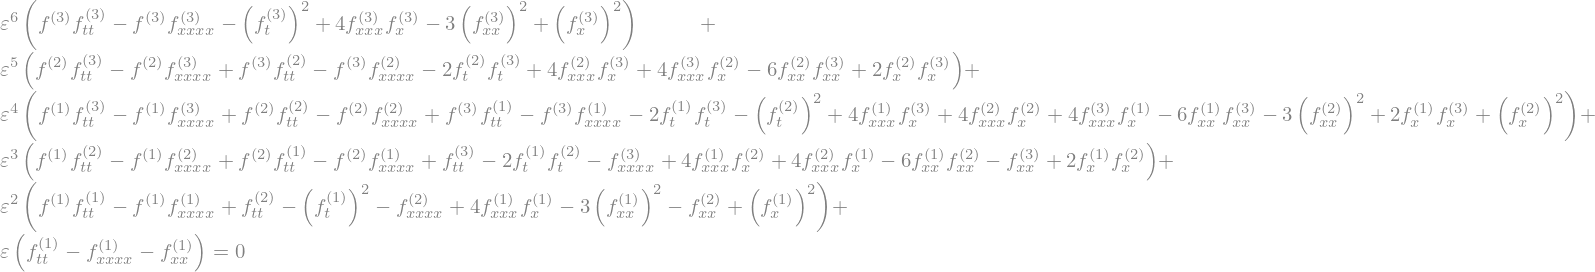

In [27]:
eps = Symbol('varepsilon')
f1, f2, f3 = symbols('f^{(1)} f^{(2)} f^{(3)}')
f1_tt, f2_tt, f3_tt = symbols('f_{tt}^{(1)} f_{tt}^{(2)} f_{tt}^{(3)}')
f1_t, f2_t, f3_t = symbols('f_{t}^{(1)} f_{t}^{(2)} f_{t}^{(3)}')
f1_xxxx, f2_xxxx, f3_xxxx = symbols('f_{xxxx}^{(1)} f_{xxxx}^{(2)} f_{xxxx}^{(3)}')
f1_xxx, f2_xxx, f3_xxx = symbols('f_{xxx}^{(1)} f_{xxx}^{(2)} f_{xxx}^{(3)}')
f1_xx, f2_xx, f3_xx = symbols('f_{xx}^{(1)} f_{xx}^{(2)} f_{xx}^{(3)}')
f1_x, f2_x, f3_x = symbols('f_{x}^{(1)} f_{x}^{(2)} f_{x}^{(3)}')

f      = 1 + eps*f1 + eps**2*f2 + eps**3*f3
f_tt   = eps*f1_tt + eps**2*f2_tt + eps**3*f3_tt
f_t    = eps*f1_t + eps**2*f2_t + eps**3*f3_t
f_xxxx = eps*f1_xxxx + eps**2*f2_xxxx + eps**3*f3_xxxx
f_xxx  = eps*f1_xxx + eps**2*f2_xxx + eps**3*f3_xxx
f_xx   = eps*f1_xx + eps**2*f2_xx + eps**3*f3_xx
f_x    = eps*f1_x + eps**2*f2_x + eps**3*f3_x

H = f*f_tt-f_xx-f*f_xxxx-f_t**2+f_x**2+4*f_x*f_xxx-3*f_xx**2
Eq(collect(expand(H), eps), 0)

Замечание: коэффициенты при $\varepsilon$ в 4, 5 и 6 степенях требуют дополнений из-за неправильной работы программы с бесконечными суммами

### Приравнивая коэффициенты при одинаковых степенях $\varepsilon$, получим бесконечную систему линейных уравнений:

### $\varepsilon:\qquad f_{tt}^{(1)} - f_{xxxx}^{(1)} - f_{xx}^{(1)}=0$

### $\varepsilon^{2}:\qquad f_{tt}^{(2)} - f_{xxxx}^{(2)} - f_{xx}^{(2)} = -f^{(1)} f_{tt}^{(1)} + f^{(1)} f_{xxxx}^{(1)} + \left(f_{t}^{(1)}\right)^{2} - 4 f_{xxx}^{(1)} f_{x}^{(1)} + 3 \left(f_{xx}^{(1)}\right)^{2} - \left(f_{x}^{(1)}\right)^{2} = -\frac{1}{2}(D_t^2-D_x^2-D_x^4)f^{(1)}f^{(1)}$

### $\varepsilon^{3}:\qquad f_{tt}^{(3)} - f_{xxxx}^{(3)} - f_{xx}^{(3)}= -f^{(1)} f_{tt}^{(2)} + f^{(1)} f_{xxxx}^{(2)} - f^{(2)} f_{tt}^{(1)} + f^{(2)} f_{xxxx}^{(1)} + 2 f_{t}^{(1)} f_{t}^{(2)} - 4 f_{xxx}^{(1)} f_{x}^{(2)} - 4 f_{xxx}^{(2)} f_{x}^{(1)} + 6 f_{xx}^{(1)} f_{xx}^{(2)} - 2 f_{x}^{(1)} f_{x}^{(2)} =-\frac{1}{2}(D_t^2-D_x^2-D_x^4)f^{(1)}f^{(2)}$

### $\varepsilon^{4}:\qquad$

### $\varepsilon^{5}:\qquad$

### $\dots\dots\dots\dots$

## =====================================================
## Рассмотрим вначале односолитонное решение уравнения Буссинеска.

### В этом случае $f^{(1)}$ предствим в виде $f^{(1)} = e^{\theta} = e^{ax-bt+\delta}$

In [28]:
theta, delta = symbols('\\theta \delta')
a, b = var('a b', positive = True)

# Подставляем в первое уравнение системы и решаем ДУ
f1 = exp(a*x-b*t+delta)

eq = Eq(f1.diff(t,t) - f1.diff(x, x, x, x) - f1.diff(x, x), 0)
eq.simplify()

In [29]:
b_ = solve(eq, b)[0]
Eq(b, b_)

In [30]:
f1 = f1.subs(b,b_)
Eq(Symbol('f^{(1)}'), f1)

### $$f^{(1)}=e^{\delta - a t \sqrt{a^{2} + 1} + a x}$$

### Подставляя во второе уравнение системы, увидим действие операторов Хироты на $e^{\theta}\bullet e^{\theta} $, что приведет к обнулению. Поэтому 
### $$f^{(2)}=0$$

### $$f = 1+\varepsilon f^{(1)}=|\varepsilon=1| =1+e^{\theta}$$
### $$\theta = \delta - a t \sqrt{a^{2} + 1} + a x$$

In [31]:
f = 1 + exp(a*x-b_*t+delta)
Eq(Symbol('f'),f)

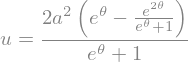

In [32]:
u = 2*(ln(f)).diff(x,x).subs([(a*x-a*sqrt(a**2+1)*t+delta, theta), (2*a*x-2*a*sqrt(a**2+1)*t+2*delta, 2*theta)])
Eq(Symbol('u'), u)

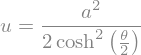

In [33]:
Eq(Symbol('u'), u.simplify())

### Таким образом односолитонное решение уравнения Буссинеска имеет вид

### $$u = \frac {a^2}{2 \cosh^2 \frac{1}{2}\left({ax - a\sqrt{a^2+1}+\delta} \right)}$$

## ====================================================================
### Теперь найдём двухсолитонное решение уравнения Буссинеска. В этом случае $f^{(1)}$ предствим в виде

### $$f^{(1)} = e^{\theta_1}+e^{\theta_2} $$

### $$\theta_i= a_ix-b_it+\delta_i, \qquad i = 1, 2$$

In [34]:
theta_1, theta_2, delta_1, delta_2 = symbols('\\theta_1 \\theta_2 \delta_1 \delta_2')
a1, b1, a2, b2 = symbols('a_1 b_1 a_2 b_2', positive = True)

# Подставляем в первое уравнение системы и решаем ДУ
f1_1 = exp(a1*x-b1*t+delta_1)
f1_2 = exp(a2*x-b2*t+delta_2)

eq1 = f1_1.diff(t,t) - f1_1.diff(x, x, x, x) - f1_1.diff(x, x)
eq2 = f1_2.diff(t,t) - f1_2.diff(x, x, x, x) - f1_2.diff(x, x)
Eq(eq1.simplify() + eq2.simplify(), 0)

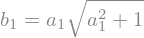

In [35]:
b1_ = solve(eq1, b1)[0]
Eq(b1, b1_)

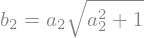

In [36]:
b2_ = solve(eq2, b2)[0]
Eq(b2, b2_)

In [37]:
f1 = f1_1.subs(b1, b1_) + f1_2.subs(b2, b2_)
Eq(Symbol('f^{(1)}'), f1)

### Подставляем $f^{(1)}$ во второе уравнение системы. Оператор $D=D_t^2-D_x^2-D_x^4$ действует на 

### $$f\bullet g = f^{(1)}\bullet f^{(1)} $$

In [1]:
Eq(Symbol('-\\frac{1}{2} D(f \\bullet f)'),simplify(-D_/2))

NameError: name 'Eq' is not defined

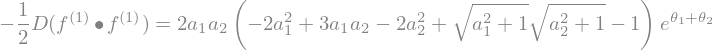

In [39]:
equation_2 = -f1*f1.diff(t,t) + f1*f1.diff(x,x) + f1*f1.diff(x,x,x,x) + (f1.diff(t))**2 - \
            (f1.diff(x))**2 - 4*f1.diff(x)*f1.diff(x,x,x) + 3*(f1.diff(x,x))**2
equation_2 = equation_2.subs([(delta_1-a1*t*sqrt(a1**2+1)+a1*x, theta_1), (delta_2-a2*t*sqrt(a2**2+1)+a2*x, theta_2)])
eq2 = equation_2.simplify()
Eq(Symbol('-\\frac{1}{2} D(f^{(1)} \\bullet f^{(1)})'), eq2)

### Чтобы решить ДУ:

### $$f_{tt}^{(2)} - f_{xxxx}^{(2)} - f_{xx}^{(2)} = 2 a_{1} a_{2} \left(- 2 a_{1}^{2} + 3 a_{1} a_{2} - 2 a_{2}^{2} + \sqrt{a_{1}^{2} + 1} \sqrt{a_{2}^{2} + 1} - 1\right) e^{\theta_1 + \theta_2},$$ 

### представим $f^{(2)} = Ae^{\theta_1 + \theta_2}$

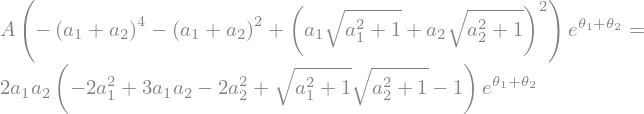

In [40]:
A, delta_12 = symbols('A \\delta_{12}\'')
f2 = A*exp(a1*x-b1*t+delta_1 + a2*x-b2*t+delta_2).subs([(b1, b1_), (b2, b2_)])
equation = (f2.diff(t,t) - f2.diff(x,x,x,x) - f2.diff(x,x)).simplify().\
            subs([(delta_1-a1*t*sqrt(a1**2+1)+a1*x, theta_1), (delta_2-a2*t*sqrt(a2**2+1)+a2*x, theta_2)])

Eq(equation, eq2)

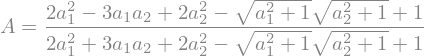

In [41]:
A = (solve(Eq(equation, eq2), A)[0]).simplify()
Eq(Symbol('A'), A)

### Подставляем $f^{(2)}$ и $f^{(1)}$ в третье уравнение системы. Оператор $D=D_t^2-D_x^2-D_x^4$ действует на $f\bullet g = f^{(1)}\bullet f^{(2)} $

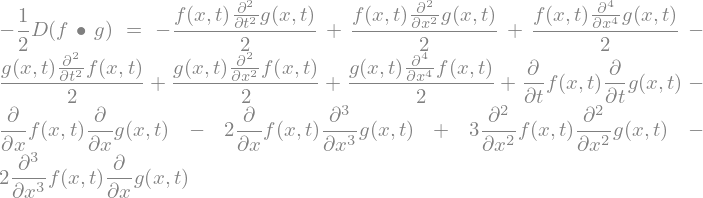

In [42]:
D = D.subs([(xi,x), (tau,t)])
Eq(Symbol('-\\frac{1}{2} D(f \\bullet g)'),-D/2)

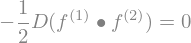

In [43]:
equation_3 = (-f1*f2.diff(t,t) + f1*f2.diff(x,x) + f1*f2.diff(x,x,x,x) - f2*f1.diff(t,t)+f2*f1.diff(x,x)+f2*f1.diff(x,x,x,x)\
            + 2*f1.diff(t)*f2.diff(t)-2*f1.diff(x)*f2.diff(x)-4*f1.diff(x)*f2.diff(x,x,x)+6*f1.diff(x,x)*f2.diff(x,x)-\
            4*f1.diff(x,x,x)*f2.diff(x))/2

equation_3 = equation_3.subs([(delta_1-a1*t*sqrt(a1**2+1)+a1*x, theta_1), (delta_2-a2*t*sqrt(a2**2+1)+a2*x, theta_2)])
eq3 = equation_3.simplify()
Eq(Symbol('-\\frac{1}{2} D(f^{(1)} \\bullet f^{(2)})'), eq3)

### ДУ: $f_{tt}^{(3)} - f_{xxxx}^{(3)} - f_{xx}^{(3)} = 0$ имеет решение $f^{(3)} = 0$. Таким образом, ряд обрывается.

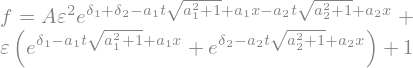

In [44]:
f = 1 + eps*f1 + eps**2*f2
Eq(Symbol('f'), f)

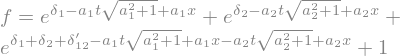

In [45]:
f = 1 + exp(a1*x-b1_*t+delta_1) + exp(a2*x-b2_*t+delta_2) + exp(a1*x-b1_*t + a2*x-b2_*t + delta_1 + delta_2 +delta_12)
Eq(Symbol('f'),f)

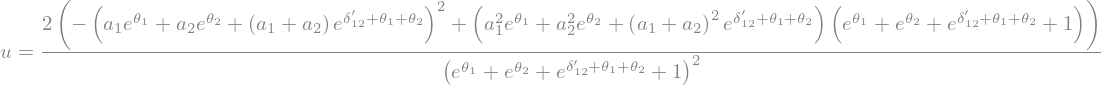

In [48]:
u = 2*(ln(f)).diff(x,x).subs([(a1*x-b1_*t+delta_1, theta_1), (a2*x-b2_*t+delta_2, theta_2),\
                              (a1*x-b1_*t + a2*x-b2_*t + delta_12, theta_1+theta_2+delta_12)])
Eq(Symbol('u'), trigsimp(u.simplify()))

### Таким образом, в результате упрощений двухсолитонное решение уравнения Буссинеска имеет вид

### $$u = \left|a_1^2-a_2^2\right|\frac {a_1^2 \cosh \left(\theta_2+\frac{\delta_{12}}{2}\right) + a_2^2 \cosh \left(\theta_1+\frac{\delta_{12}}{2}\right) + \left|a_1^2-a_2^2\right|}{\left[\left|a_1-a_2\right|\cosh\left(\frac{\theta_1+\theta_2+\delta_{12}}{2}\right) + \left(a_1+a_2\right)\cosh\left(\frac{\theta_2-\theta_1}{2}\right)\right]^2}$$

### $$\delta_{12}=\ln(A), \qquad \varepsilon = 1$$

### $$A=\frac{2 a_{1}^{2} - 3 a_{1} a_{2} + 2 a_{2}^{2} - \sqrt{a_{1}^{2} + 1} \sqrt{a_{2}^{2} + 1} + 1}{2 a_{1}^{2} + 3 a_{1} a_{2} + 2 a_{2}^{2} - \sqrt{a_{1}^{2} + 1} \sqrt{a_{2}^{2} + 1} + 1}$$

![SSS](https://sun9-5.userapi.com/impg/CUuSR445PtNhYYbyyfaYZTitdlG-SEzVA74Aow/xKAP0FRkH8M.jpg?size=1280x610&quality=96&sign=8e85b9e4263e4dfd90dcbd907065c265)